In [9]:
import os
import cv2
import dlib
import glob
import time
import face_recognition

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

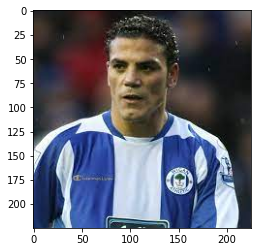

In [7]:
img = mpimg.imread(r"F:\face recognition\photos\amr zaki.jpg")
imgplot = plt.imshow(img)
plt.show()

In [11]:
def load_encodings_from_folder(folder_path):
    encodings = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r') as file:
                lines = file.readlines()
                encodings[file_name[:-4]] = [float(line.strip()) for line in lines]
    return encodings

def find_nearest_match(unknown_encoding, known_encodings):
    best_match_name = None
    best_distance = float('inf')

    for name, known_encoding in known_encodings.items():
        distance = face_recognition.face_distance([known_encoding], unknown_encoding)[0]

        if distance < best_distance:
            best_distance = distance
            best_match_name = name

    return best_match_name, best_distance

def recognize_faces_in_video(video_path, known_encodings_folder, output_video_path):
    known_encodings = load_encodings_from_folder(known_encodings_folder)

    video_capture = cv2.VideoCapture(video_path)
    fps = video_capture.get(cv2.CAP_PROP_FPS)
    frame_size = (int(video_capture.get(3)), int(video_capture.get(4)))

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, frame_size)

    while True:
        # Read the next frame from the video
        ret, frame = video_capture.read()

        if not ret:
            break

        # Convert the frame from BGR to RGB (as face_recognition uses RGB)
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Find all face locations and face encodings in the current frame
        face_locations = face_recognition.face_locations(rgb_frame)
        face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

        # Process each face in the frame
        for face_location, face_encoding in zip(face_locations, face_encodings):
            # Find the nearest match for each face
            best_match_name, best_distance = find_nearest_match(face_encoding, known_encodings)

            # Draw a rectangle around the face
            top, right, bottom, left = face_location
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)

            # Put the name on the rectangle
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(frame, best_match_name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

        # Write the frame to the output video
        out.write(frame)

        # Display the modified frame
        cv2.imshow('Video', frame)

        # Break the loop if 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    out.release()
    cv2.destroyAllWindows()

# Example usage
video_path = r"C:\Users\pc\Videos\Download Videos\emam.mp4"
known_encodings_folder = r"F:\face recognition\saved_text"
output_video_path = r"F:\face recognition\output_video\output.mp4"

recognize_faces_in_video(video_path, known_encodings_folder, output_video_path)